In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lab02R06Pc44\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Preprocessing 
    1- Data Cleaning
    2- EDA 
    3- Text Preprocessing
    

### 1- Data Cleaninig

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [8]:
df.sample(5)

,v1,v2
249,spam,Congratulations ur awarded 500 of CD vouchers ...
1725,ham,You know there is. I shall speak to you in &l...
489,ham,I think i've fixed it can you send a test mess...
2258,ham,Sad story of a Man - Last week was my b'day. M...
1223,ham,Rofl betta invest in some anti aging products


In [9]:
# renaming columns 
df = df.rename(columns={'v1':'target','v2':"text"})

In [10]:
df.sample(5)

,target,text
2222,ham,Great. I was getting worried about you. Just k...
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
2747,ham,Ya had just now.onion roast.
2589,spam,Join the UK's horniest Dogging service and u c...
4298,ham,Hurt me... Tease me... Make me cry... But in t...


In [11]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

In [12]:
#Classification - Binary Classfication

In [13]:
encoder = LabelEncoder()
df.target = encoder.fit_transform(df.target)

In [14]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep="first")

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

### 2. Exploratory Data Analysis (EDA)

In [20]:
label_counts = df.target.value_counts()
label_counts

0    4516
1     653
Name: target, dtype: int64

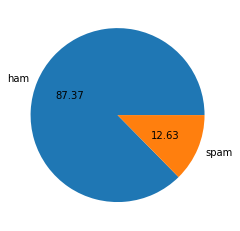

In [21]:
plt.pie(label_counts, labels=['ham','spam'],autopct="%.02f")
plt.show()

In [22]:
df['number_of_char']=df['text'].apply(len)
df.head()

,target,text,number_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['number_of_words']=df['text'].apply(lambda x:len(x.split(" ")))
df.head()

,target,text,number_of_char,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [24]:
df['number_of_sentences']=df['text'].apply(lambda x:len(x.split(".")))
df.head()

,target,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [25]:
# number of words using tokenization
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df

,target,text,number_of_char,number_of_words,number_of_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,24
1,0,Ok lar... Joking wif u oni...,29,6,7,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,37
3,0,U dun say so early hor... U c already then say...,49,11,7,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,15
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,5,35
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,15
5570,0,The guy did some bitching but I acted like i'd...,125,26,1,27


In [27]:
df = df.drop('number_of_words',axis=1)

In [28]:
# number of words using tokenization
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(10)

,target,text,number_of_char,number_of_sentences,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,9,24,2
1,0,Ok lar... Joking wif u oni...,29,7,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,2
3,0,U dun say so early hor... U c already then say...,49,7,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,2,39,4
6,0,Even my brother is not like to speak with me. ...,77,3,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,2,31,2
8,1,WINNER!! As a valued network customer you have...,158,4,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,1,31,3


In [30]:
df.iloc[0]['text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [31]:
df = df.drop('number_of_sentences',axis=1)

In [32]:
df

,target,text,number_of_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
# stats behind all new added columns
df[['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# stats behind all new added columns in spam
df[df['target']==1][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# stats behind all new added columns in ham
df[df['target']==0][['number_of_char','num_words','num_sent']].describe()

,number_of_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
import seaborn as sns 

<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

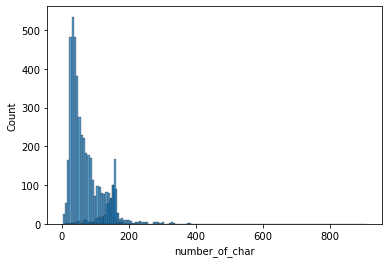

In [38]:
sns.histplot(df[df['target']==0]['number_of_char'])
sns.histplot(df[df['target']==1]['number_of_char'])

<AxesSubplot:xlabel='num_words', ylabel='Count'>

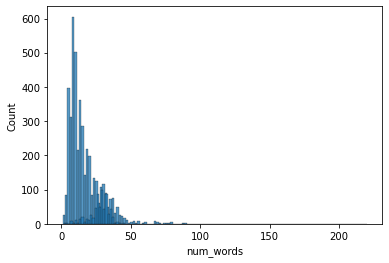

In [40]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

In [ ]:
df.corr()